In [1]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

import numpy as np
import pandas as pd

In [2]:
enc_df = pd.read_csv("enc_tok.csv", header=0,names = ['label', 'features'])


In [3]:
features = enc_df['features'].values
labels = enc_df['label'].values
labels = np.array(labels)
X = []

for feature in features:
    temp = feature[1:-1].split()
    X.append([float(temp[0]), float(temp[1])])

X = np.array(X)

In [4]:
def analysis():
    km_scores= []
    km_silhouette = []
    vmeasure_score =[]
    db_score = []
    X_scaled = X
    
    n = 20

    for i in range(2,n):
        km = KMeans(n_clusters=i, random_state=0)
        preds = km.fit_predict(X_scaled)

        #print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
        km_scores.append(-km.score(X_scaled))

        silhouette = silhouette_score(X_scaled,preds)
        km_silhouette.append(silhouette)
        #print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

        db = davies_bouldin_score(X_scaled,preds)
        db_score.append(db)
        #print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    plt.figure(figsize=(12,5))
    plt.title("The elbow method for determining number of clusters\n",fontsize=16)
    plt.plot([i for i in range(2,n)],km_scores, marker = 'o')
    plt.grid(True)
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("K-means score",fontsize=15)
    plt.xticks([i for i in range(2,n)],fontsize=14)
    plt.yticks(fontsize=15)
    plt.savefig('the_elbow_method.png')
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
    plt.plot([i for i in range(2,n)], km_silhouette, marker = 'o')
    plt.grid(True)
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("Silhouette score",fontsize=15)
    plt.xticks([i for i in range(2,n)],fontsize=14)
    plt.yticks(fontsize=15)
    plt.savefig('the_silhouette_coefficient_method.png')
    plt.show()
    
    
    plt.figure(figsize=(12,5))
    plt.plot([i for i in range(2,n)], db_score, marker = 'o')
    plt.grid(True)
    plt.xlabel('Number of Clusters',fontsize=14)
    plt.title("Davies-Bouldin score")
    plt.savefig('davies_bouldin_score.png')
    plt.show()
    

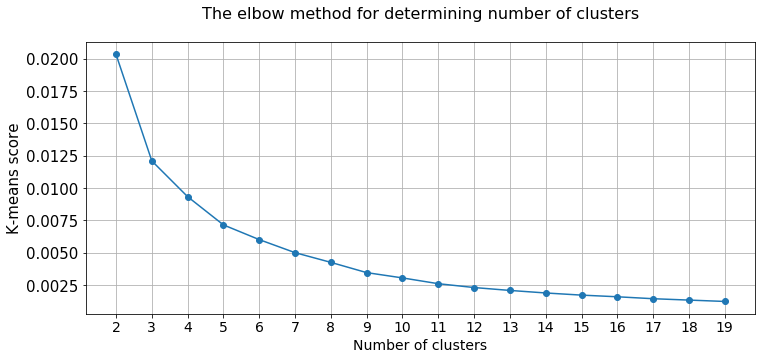

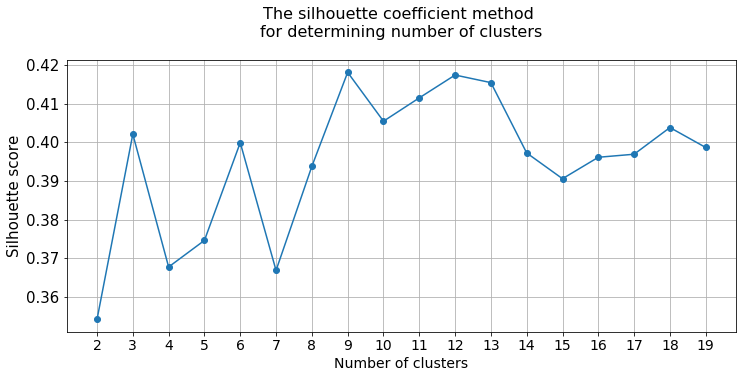

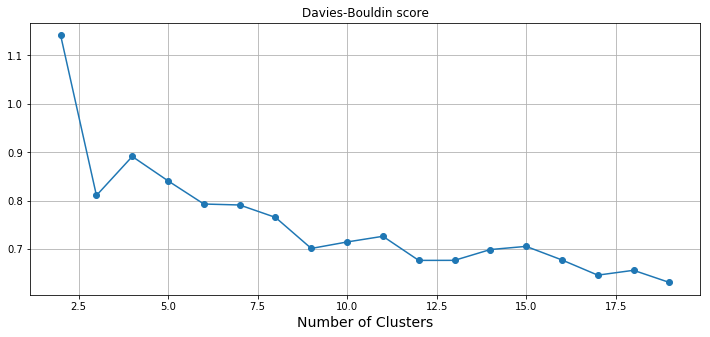

In [5]:
analysis()

In [6]:
def annotate(plt, indices, X, Y):
    for index, (x,y) in enumerate(zip(X,Y)):
        label = labels[indices[index]]


        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    

In [7]:
def plot(clusters):
    kmeans = KMeans(n_clusters=clusters, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
    # We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
    y_kmeans = kmeans.fit_predict(X)
    indices = []
    plt.figure(figsize=(26,13))
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'black']
    for i in range(0, clusters):
        indices.append((y_kmeans==i).nonzero()[0])
        plt.scatter(X[indices[i], 0], X[indices[i], 1], s=100, c=colors[i], label ='Cluster ' + str(i+1))
        annotate(plt, indices[i], X[indices[i], 0], X[indices[i], 1])
    
    plt.title(str(clusters) + ' Language Clusters')

    plt.show()
    
    
    
    

In [10]:
kmeans = KMeans(n_clusters=9, init ='k-means++', max_iter=300, n_init=10,random_state=0 )


In [17]:
y_kmeans = kmeans.fit_predict(X)
labels.index('en')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

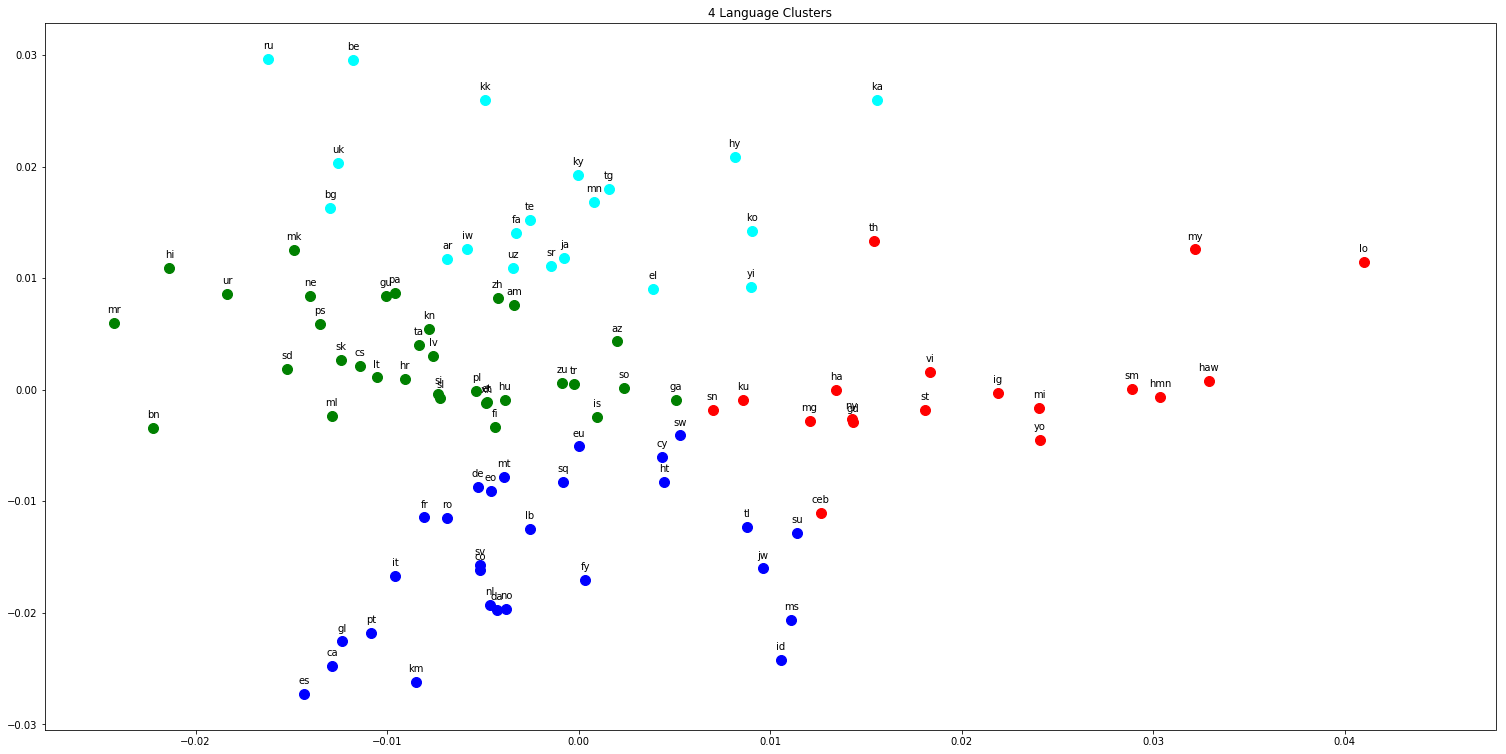

In [44]:
plot(4)

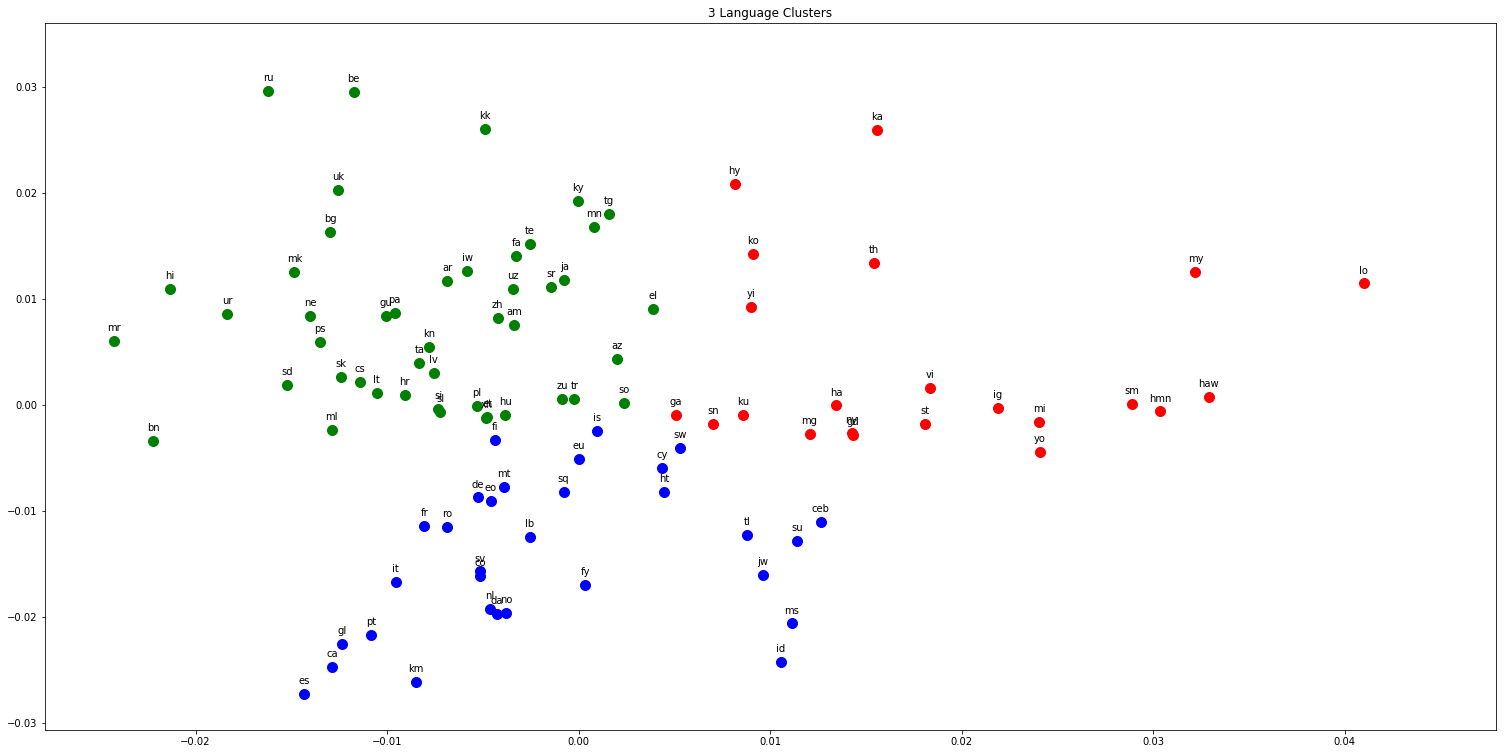

In [46]:
plot(3)